Task 1
In a new jupyter notebook import:

pandas,
matplotlib.pyplot
seaborn
** You will need to install Seaborn if you haven't used it prior. **

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Task 2
Download ux_gender_data.csv from github

https://github.com/nerdygirlcodes/interactive-data/blob/main/Challenges/ux_gender_data.csv

Task 3
Using pandas.read_csv() - convert the file to a DataFrame object

Convert the data to Tidy Data

In [32]:
# read the csv data
ux_data_raw = pd.read_csv('ux_gender_data.csv')

In [33]:
ux_data_raw 

,year,male,female
0,2010,0.6188,0.3812
1,2011,0.6212,0.3788
2,2012,0.6135,0.3865
3,2013,0.6367,0.3633
4,2014,0.6160,0.3840
5,2015,0.6231,0.3769
6,2016,0.6125,0.3875
7,2017,0.6032,0.3968
8,2018,0.6243,0.3757
9,2019,0.5938,0.4062


In [34]:
# pivot and clean the data into tidy data standards using 'pandas melt()'
ux_data = pd.melt(
    ux_data_raw, # dataframe being pivoted
    id_vars='year',  # column to be used as main observation variable
    value_vars=['male', 'female'], # column(s) to be pivioted out
    var_name='gender', # name of new pivoted column
    value_name='percent', # name of new value column
)

In [35]:
# set the proper data types
ux_data = ux_data.astype({
    'year': 'category',
    'gender': 'category',
    'percent': 'float'
})

In [36]:
# group the data by year and gender
yg_group = ux_data.groupby(['year', 'gender'])

Task 4
In a new code cell, using Matplotlib, create and show a figure that includes one axis with a stacked horizontal bar plot of the ‘male’ and ‘female’ variables across ‘year’

Label the axes 'Year' and 'Gender by %'
Label the figure 'UX Designer by Gender % over Year'
Have a legend

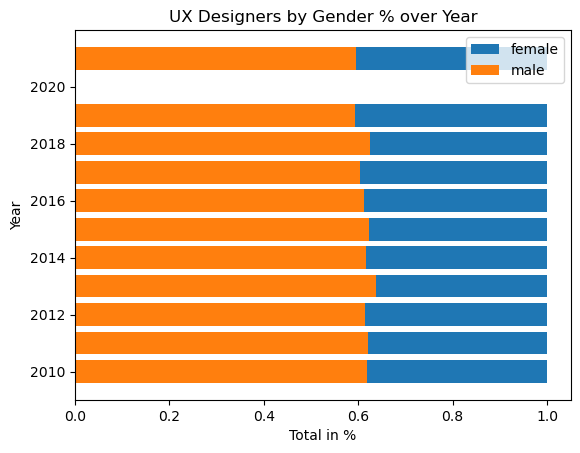

In [37]:
# create a new 
fig_1, ax_1 = plt.subplots()

# loop through the grouped data
for idx, o in yg_group:
    if o.gender.item() == 'male':
        # if male, display as tab:orange and label as male
        ax_1.barh(o.year, o.percent, left=0, label='male', color="tab:orange")
    else:
        # if female, calculate its starting point on the bar
        start_loc = 1 - o.percent
        # start at the calculated offset, display as tab:blue and label as female
        ax_1.barh(o.year, o.percent, left=start_loc, label='female', color="tab:blue")

# setup legend
ax_1.legend(['female','male'])

# set axes labels + title
ax_1.set(xlabel='Total in %', ylabel='Year', title='UX Designers by Gender % over Year')

# display figure
plt.show()

Task 5
In a new code cell, using Seaborn, plot the same data.

** We found the easiest option is to use a histogram plot, not a bar plot. **

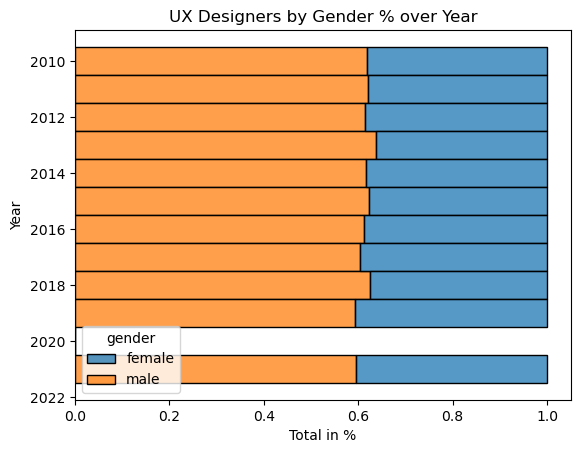

In [38]:
# create a matplotlib figure
fig_2, ax_2 = plt.subplots()

# map the values with a histplot, labels and colors are auto set based on 'hue'
sns.histplot(ux_data, y='year', hue='gender', weights='percent', multiple='stack')

# set axes labels + title
ax_2.set(xlabel='Total in %', ylabel='Year', title='UX Designers by Gender % over Year')

# display figure
plt.show()

In a new markdown cell, describe the similarities and differences you noticed between using matplotlib and seaborn to map this data. What do you think is the benefit of using seaborn over matplotlib?
Similarities:

Both libraries create a bar chart or histogram to visualize data and provide customized the labels, title, and other features of the plot. Also, they can plot multiple data sets on the same chart, with different colors or labels.
Both of them create visually appealing and informative plots.

Differences:

 Matplotlib created a horizontal bar chart and Seaborn created a stacked histogram. The Seaborn implementation requires fewer lines of code and handles the stacking of bars automatically, while the Matplotlib implementation requires explicitly calculating the starting point of the bars for each group. The Seaborn implementation also automatically sets colors and labels based on the "hue" variable, which simplifies the code even further.

The benefit of using Seaborn over Matplotlib is that it offers a high-level interface that can simplify the creation of complex visualizations. Seaborn automates several aspects of data manipulation and visualization, making it easier to create specific types of plots. It also provides default color palettes and labels that can make plots more visually appealing and informative with minimal customization. Matplotlib is a more flexible library, but requires more manual customization to create the desired plot.
